# Chapter 5 Support Vector Machines

SVM type of ML model capable of performing linear and non-linear classification, regression, and outlier detection. It is one of the most popular models in ML and particularly well-suited for classification of complex, but small or medium sized datasets. 

This chapter will explain the core concepts of SVM, how to use them, and how they work.

## Linear SVM Classification 

You can think of an SVM as fitting the larest possible "street" or margins btw decision boundaries as possible. See the representation on the right. This is called large margin classification. 

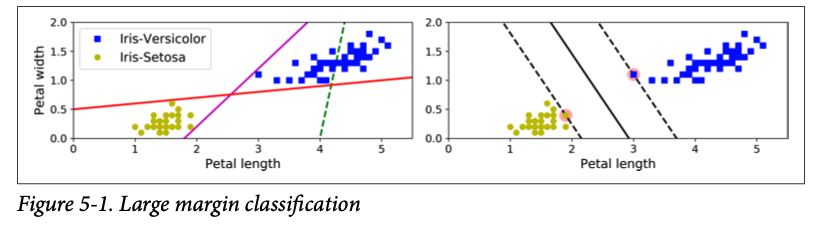

Notice that the two instances on the edge of the street (highlighted in red). These instances are called the _support vectors_. Adding more training instances "off the street" will not affect the decision boundary at all. 

note: SVMs are sensitive to feature scales. 

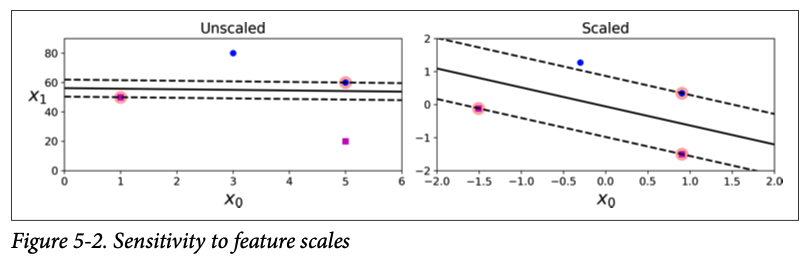



## Soft Margin Classification

_hard margin classification_ is not very helpful because it strictly imposes all instances to be "off the street". First, it only works on linearly separable data (ie. you can have a curving boundary), and second, it is sensitive to outliers --so it doesn't generalize well. 

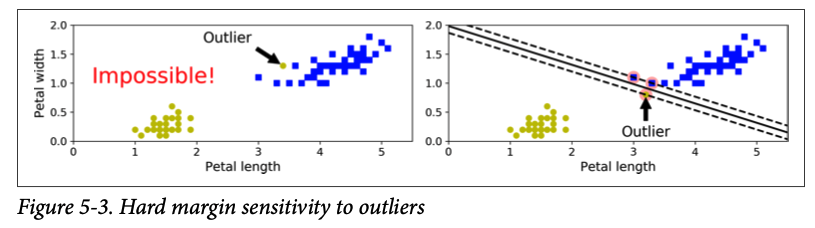

To avoid this lack of inflexibility in the model, we suggest _soft margin classification_. A more flexible model, soft margin finds a good balance btw keeping the street as possible & limiting the _margin violations_ (ie. instances that end up in the middle of the street or even on the wrong side).

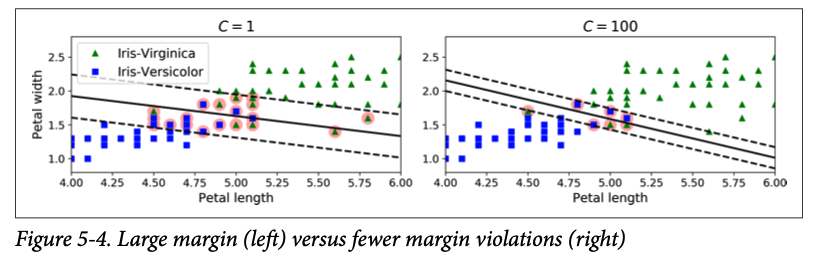

The code below loads the iris dataset, scales the features, and trains a linear SVM model:

In [2]:
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # Petal length, Petal width 
y = (iris["target"] == 2).astype(np.float64) # classifying for Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
     ("linear_svc", LinearSVC(C = 1, loss = "hinge")), 
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])


array([1.])

Unlike Logistic Regression classifers, SVM classifiers don't output a probability. 

helpful tips for optimizing: 
1. LinearSVC class regularizes the bias term automatically if you use the StandardScaler (make sure to do this). 
2. Set the _loss_ hyperparameter to "hinge" since it is not the default value. 
3. For best performance, set the dual hyperparameter to _False_ unless there are more features than instances. 



## Nonlinear SVM Classification

Though linear SVM classifiers are very efficent, some datasets are not even close to being linearly separable. One approach to this concern is to add more feature --polynomial features-- which can make the results linearly separable.

In representation below, when just one feature is present, it isn't separable, but when two are, it is linearly separable:
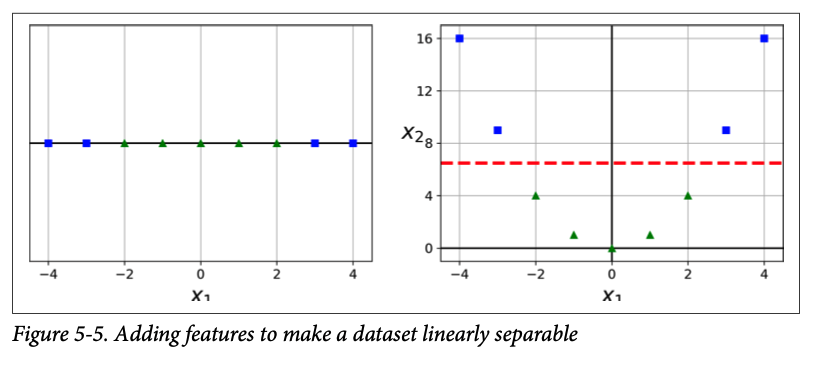

So, to implement this idea, let's create a pipeline containing a PolynomialFeature transformer, then StandardScaler, and LinearSVC. We'll be testing on a moons dataset. 

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])
    
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

this the representation you get using a linear SVM classifer using polynomial features:

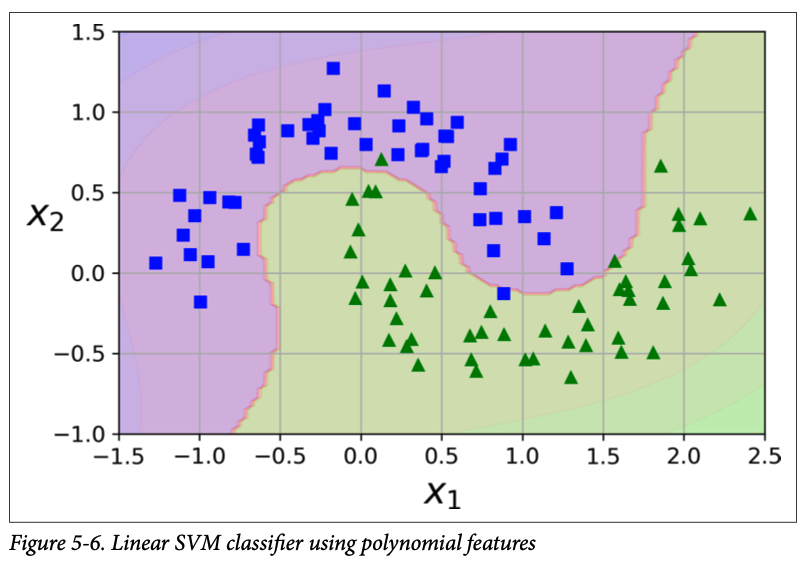



## Polynomial Kernel

Adding polynomial features is simple to implement and can work with all sorts of ML algos. But, at a low polynomial degree, the model can't deal with very complex datasets. On the other hand, w/ a high polynomial degree the model creates too many features making the model too slow. 

FORTUNATELY, when using SVMs you can apply a miraculous math technique called the _kernel trick_ where you can get the same results as if you added many olynomial featuers, even with very high degree polynomial features without actually having to add them --so no combinatorial explosion of the number of features will take place since you don't actually add any features. It is implemeneted by the SVC class.

Let's test it!

In [9]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains a SVM classifier using a 3rd degree poly kernel. It is rep on the left. on the right is another SVM classifer using 10th degree poly kernel. You can adjust the poly degree based on the rep. The hyperparameter coef0 controls how much the model is influenced by high degree vs low degree poly.
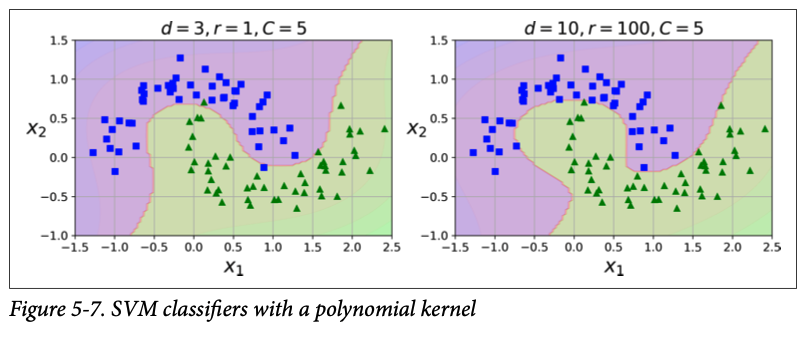

note: to find the right hyperparameter values, a common appraoch is to use grid search. A good practice is do a coarse initial grid serach, then a finer grid search to find the best values. 



## Adding Similarity Features

Another way to tackle non-linear problems is to add feautres that use a _simlarity function_ that uses the releative distance of each instance to a landmark to transform a non-linear -> linaer problem. E.g., let's take the one dimension dataset from earlier and add two landmarks at x = 2 and x = 1. We feed this into the Gaussian RBF function to transform the representation into a linear form we can work with. 

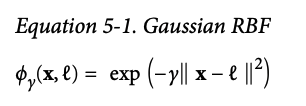

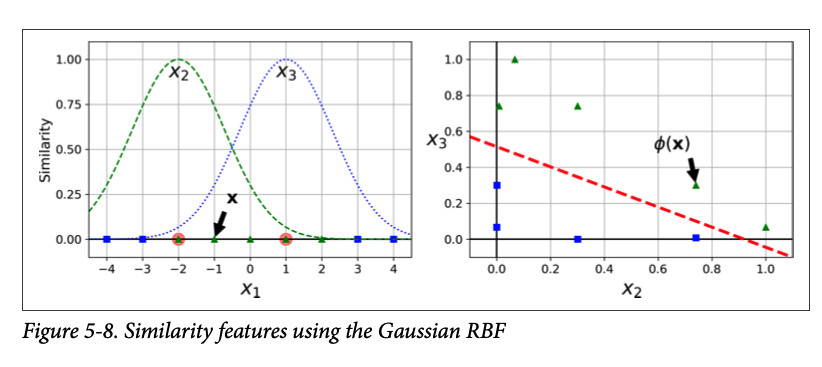

Even though this make our representation linearly separable now, the question remains: how do you select the correct landmarks?

The simplest appraoch is to create a landmark at the location of each and every instance in the dataset. The downside is that this is computationally expensive (m features --if you have a V large dataset, you are goign to end up with an equally large number of features).

However, one way around this is that kernel trick we used with polynomial features can also do its SVM magic when using simlarity features. 

Let's try Gaussian RBF kernel using the SVC class: 


In [11]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

the classifier on the bottom right is produced from the above code: 

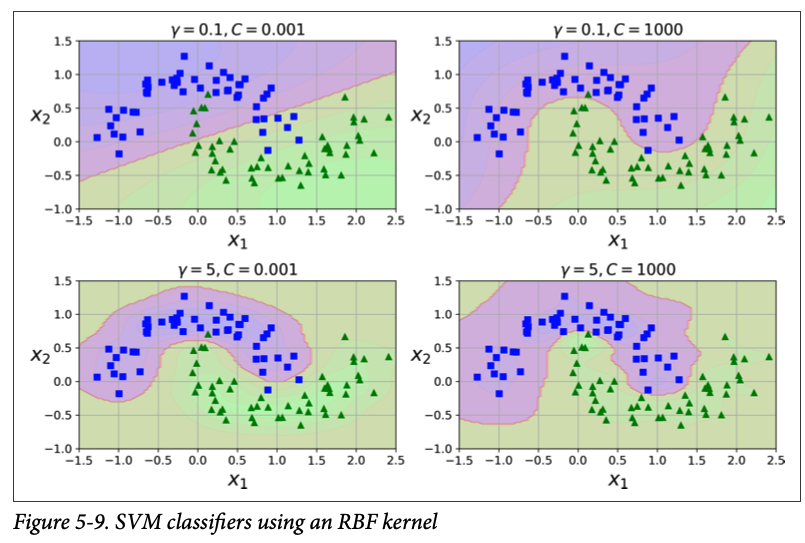

there are other kernels that exist too. So, with multiple kernels, how do you know which one to use? 

First, you should always try thte linear kernel (LinearSVC is much faster than SVC("kernel" = linaer)), especially when the training set is very large. If the training set is small, you should try Gaussian RBF kernel as well --works well in most cases. 


## Computational Complexity

Below is a summary of the time complexity associated with each SVM classification:

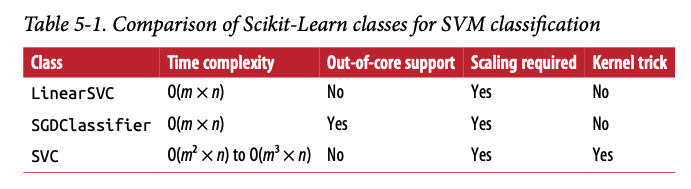


## SVM Regression

As mentioned before, SVM is versatile --can be used with non-linear and linear classification. But, it does more than that! It also supports linear and non-linear regressions!

For the regressions, you want to reverse the objective: instead of trying to fit the largest possible street btw two classes, we want to fit as many possible instances as we can on the street while limiting margin violations (instances off the street). The width is controlled by the hyperparameter ε. Below are two SVM regressions with different hyperparamter margins. 

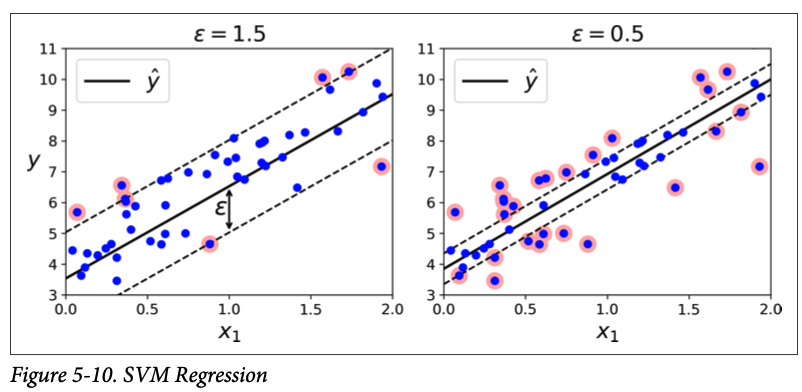

Adding more instances inside the margin doesn't affect the model's predictions. The model is ε-insensitive. The code below produces the representation on the left of Figure 5-10. 

In [13]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

To use non-linear regression tasks, you can use a kernelized SVM model. E.g. is a quadratic training set, using a 2nd degree polynomial kernel. Little regularization on the left (large C value), and more on the right (small C value).

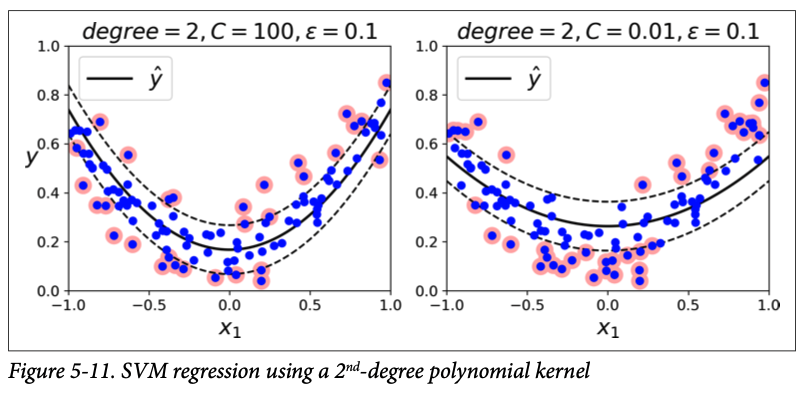

Let's code the bottom left represenation below! 
note: SVR class is the analog to the SVC class except SVR is for regression and SVC is for classification. Again, remember that both are use to scale the training set linearly --both also cana get much slower when the training set gets larger --computational complexity. 

note: svm can also be used for outlier detection!

In [15]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

## Under the Hood

Not incredibly important, but explains the intuition about the algo and why it works. 

For notation purposes, when talking SVM, the bias term is called _b_ and the feature weight vector is called _w_. 

Common kernels:

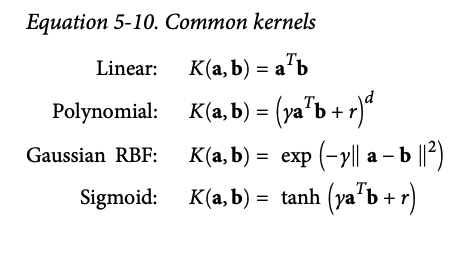

## Exersizes 
(see page 176)